In [1]:
import sys
sys.path.insert(0, 'C:/Users/amanu/OneDrive/Desktop/week_0/')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Define file paths
file_paths = {"Benin (Malanville)": "../data/benin-malanville.csv","Sierra Leone (Bumbuna)": "../data/sierraleone-bumbuna.csv", "Togo (Dapaong)": "../data/togo-dapaong_qc.csv"
}

# Load the data
dataframes = {location: pd.read_csv(file_path) for location, file_path in file_paths.items()}


C:\Users\amanu\AppData\Local\Temp\ipykernel_7704\50700958.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_df.index, y="GHI Mean", data=stats_df, ax=axes[0], palette="Blues_d")
C:\Users\amanu\AppData\Local\Temp\ipykernel_7704\50700958.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_df.index, y="DNI Mean", data=stats_df, ax=axes[1], palette="Greens_d")
C:\Users\amanu\AppData\Local\Temp\ipykernel_7704\50700958.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_df.index, y="DHI Mean", data=stats_df, ax=axes[2]

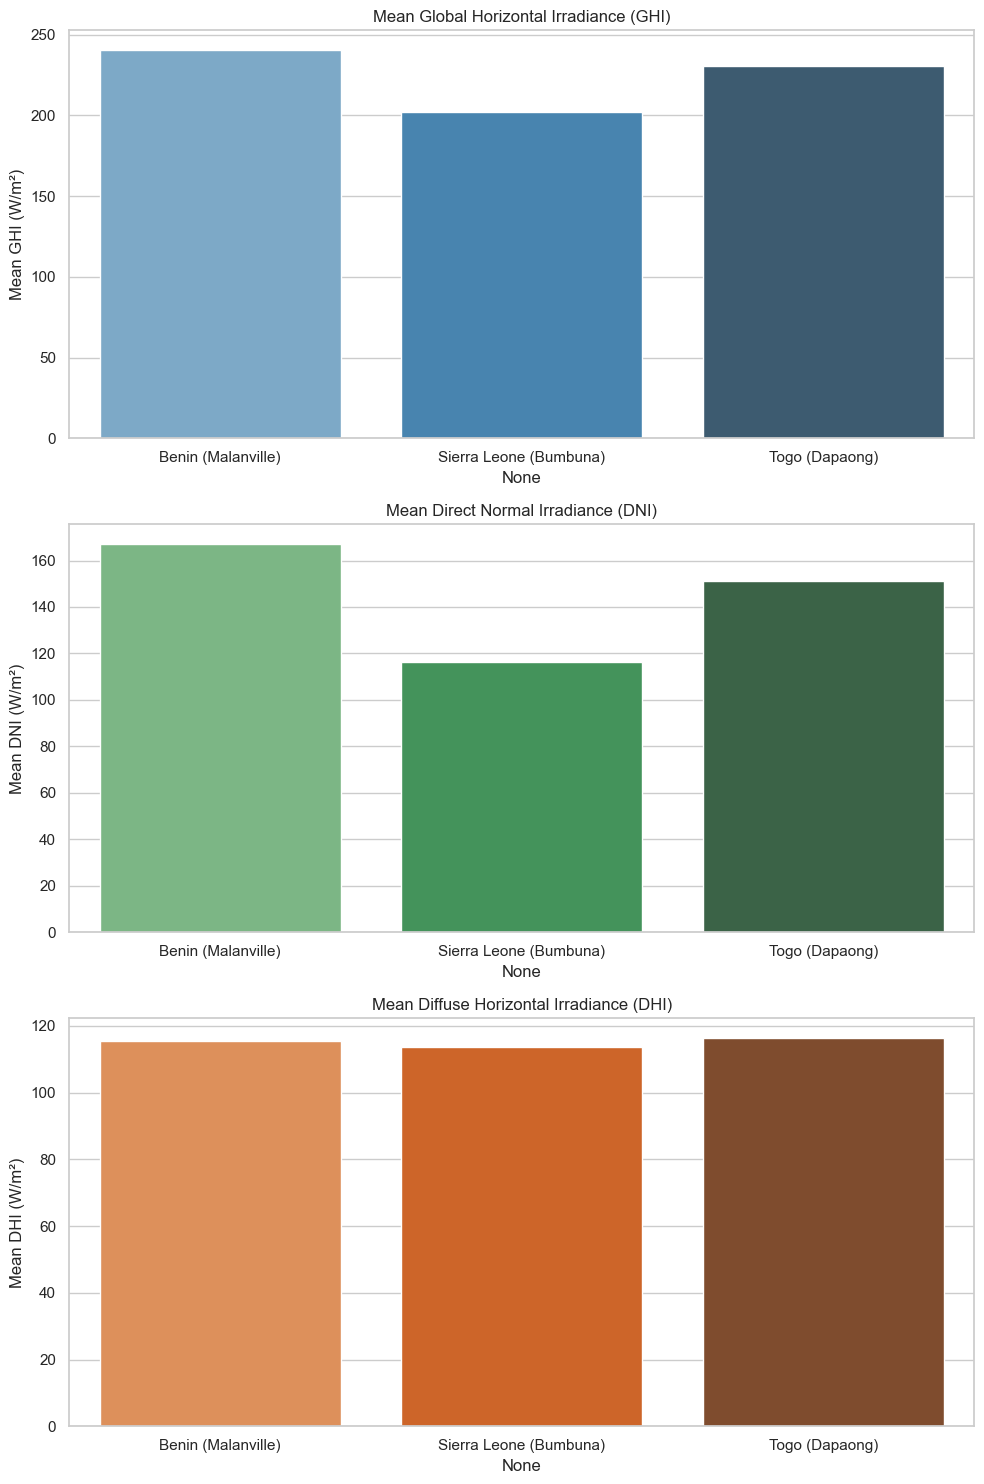

In [4]:

# Calculate mean and standard deviation for GHI, DNI, and DHI for each location
stats = {}
for location, df in dataframes.items():
    ghi_mean = df['GHI'].mean()
    dni_mean = df['DNI'].mean()
    dhi_mean = df['DHI'].mean()
    ghi_std = df['GHI'].std()
    dni_std = df['DNI'].std()
    dhi_std = df['DHI'].std()
    
    stats[location] = {
        'GHI Mean': ghi_mean,
        'GHI StdDev': ghi_std,
        'DNI Mean': dni_mean,
        'DNI StdDev': dni_std,
        'DHI Mean': dhi_mean,
        'DHI StdDev': dhi_std
    }

# Convert the stats dictionary to a DataFrame for easier analysis and visualization
stats_df = pd.DataFrame(stats).T

# Set the style for the plots
sns.set(style="whitegrid")

# Plotting the GHI, DNI, and DHI Mean values
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot GHI
sns.barplot(x=stats_df.index, y="GHI Mean", data=stats_df, ax=axes[0], palette="Blues_d")
axes[0].set_title('Mean Global Horizontal Irradiance (GHI)')
axes[0].set_ylabel('Mean GHI (W/m²)')

# Plot DNI
sns.barplot(x=stats_df.index, y="DNI Mean", data=stats_df, ax=axes[1], palette="Greens_d")
axes[1].set_title('Mean Direct Normal Irradiance (DNI)')
axes[1].set_ylabel('Mean DNI (W/m²)')

# Plot DHI
sns.barplot(x=stats_df.index, y="DHI Mean", data=stats_df, ax=axes[2], palette="Oranges_d")
axes[2].set_title('Mean Diffuse Horizontal Irradiance (DHI)')
axes[2].set_ylabel('Mean DHI (W/m²)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


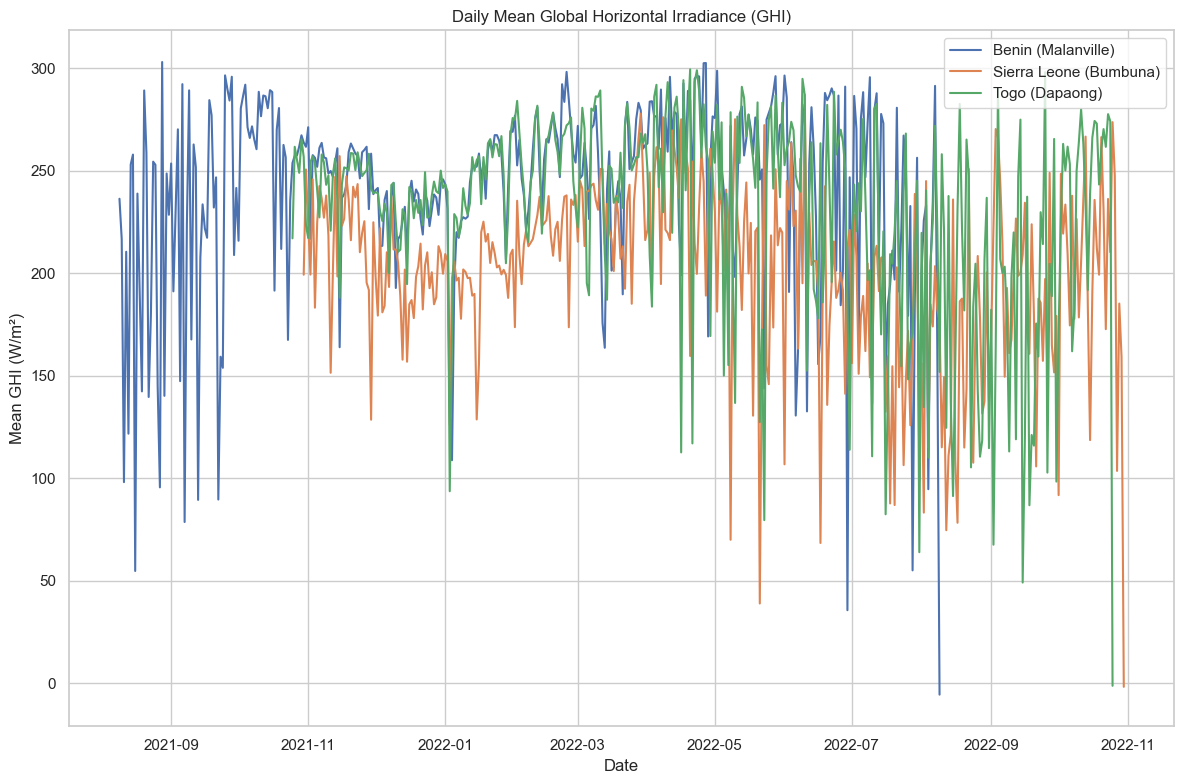

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (assuming you've already loaded the data into dataframes)
# Example: dataframes = {'Benin': df_benin, 'Sierra Leone': df_sierra_leone, 'Togo': df_togo}

# Convert 'Timestamp' column to datetime
for location, df in dataframes.items():
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Set the Timestamp as the index
    df.set_index('Timestamp', inplace=True)

# Resample data to daily means
daily_data = {location: df.resample('D').mean() for location, df in dataframes.items()}

# Plotting GHI over time for each location
plt.figure(figsize=(12, 8))

for location, df in daily_data.items():
    plt.plot(df.index, df['GHI'], label=location)

plt.title('Daily Mean Global Horizontal Irradiance (GHI)')
plt.xlabel('Date')
plt.ylabel('Mean GHI (W/m²)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


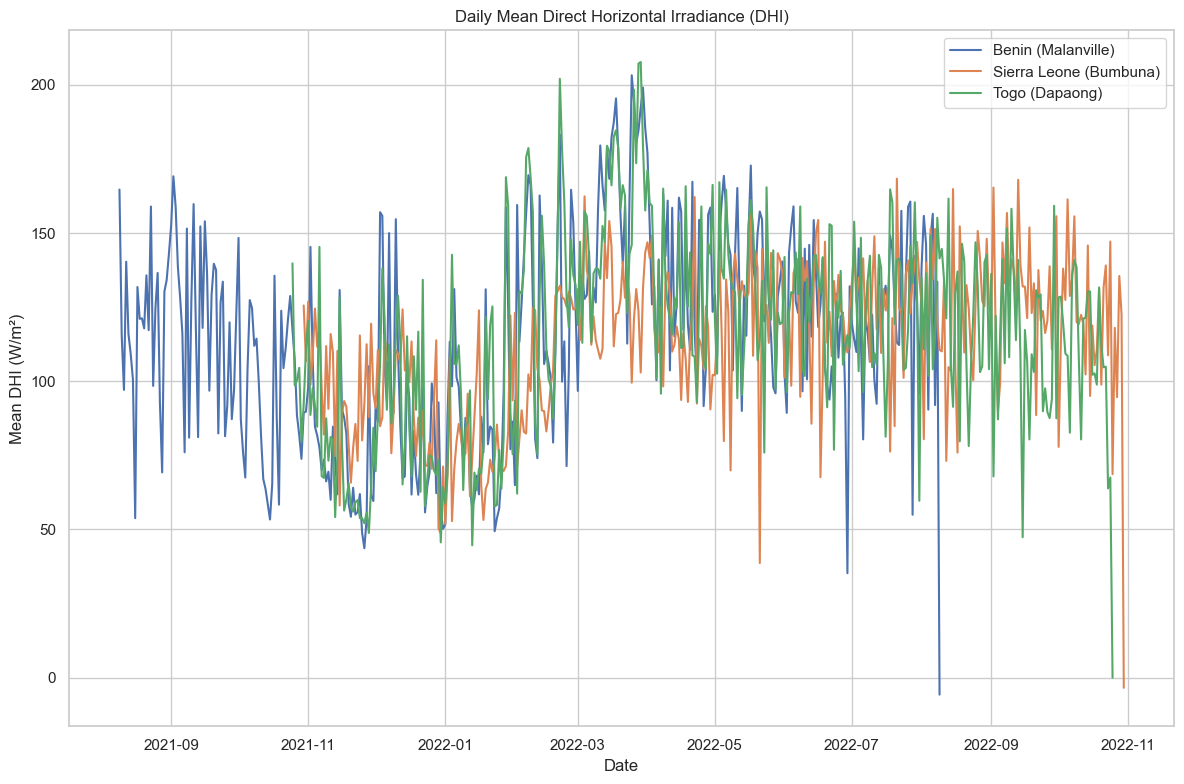

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (assuming you've already loaded the data into dataframes)
# Example: dataframes = {'Benin': df_benin, 'Sierra Leone': df_sierra_leone, 'Togo': df_togo}

# Convert 'Timestamp' column to datetime
for location, df in dataframes.items():
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Set the Timestamp as the index
    df.set_index('Timestamp', inplace=True)

# Resample data to daily means
daily_data = {location: df.resample('D').mean() for location, df in dataframes.items()}

# Plotting DHI over time for each location
plt.figure(figsize=(12, 8))

for location, df in daily_data.items():
    plt.plot(df.index, df['DHI'], label=location)

plt.title('Daily Mean Direct Horizontal Irradiance (DHI)')
plt.xlabel('Date')
plt.ylabel('Mean DHI (W/m²)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
